In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lombscargle
from astropy.timeseries import LombScargle
from scipy.optimize import curve_fit

In [94]:
data_t = [2455109.3307,
          2455117.3511,
          2455119.2754,
          2455120.3459,
          2455122.2603,
          2455123.3606,
          2455162.2315,
          2455176.2273,
          2455178.2297,
          2455461.4340,
          2455484.3772,
          2455489.3700
         ]

data_Bl = [8.7,
          2.6,
          -60.6,
          -76.2,
          -35.7,
          -9.3,
          79.9,
          52.7,
          -44.6,
           68.0,
           53.2,
           7.0
          ]

data_t=np.array(data_t)
data_Bl=np.array(data_Bl)
data_t = data_t-np.min(data_t)

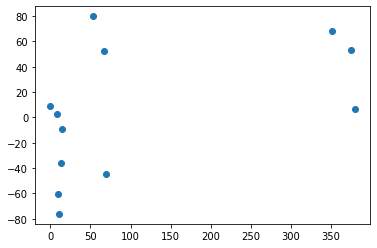

In [95]:
plt.scatter(data_t,data_Bl)

In [96]:
freq,power=LombScargle(data_t, data_Bl).autopower()

Period found at 102.71 days
Period found at 80.86 days
Period found at 77.56 days
Period found at 64.41 days
Period found at 62.30 days
Period found at 53.53 days
Period found at 32.48 days
Period found at 31.94 days
Period found at 15.26 days
Period found at 14.67 days


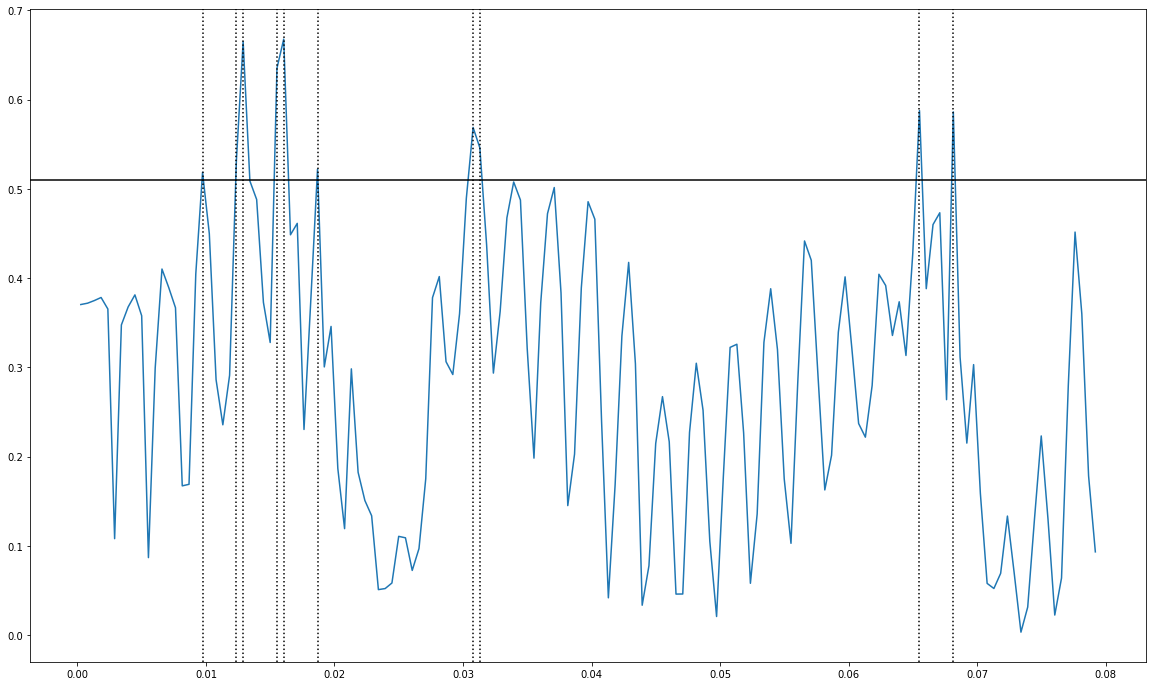

In [99]:
plt.figure(figsize=(20,12))
plt.plot(freq,power)
found_freq=freq[np.argmax(power)]
#selfreqs = [found_freq,0.225,0.205,0.065,0.154,0.083,0.295,0.03]
#plt.yscale("log")
th = 0.51
plt.axhline(th,c="k",linestyle="-")
thf = [freq[i] for i in range(len(power)) if power[i]>=th]
for ff in thf:
    plt.axvline(ff,c="k",linestyle=":")
    #print("Freq. found at {:.2f} cpd".format(ff))
    print("Period found at {:.2f} days".format(1/ff))


In [48]:
ymax =83.8
ymin = -76.61
B0 = (ymax+ymin)/2
B1 = (ymax-ymin)/2
phi0 = 0.417
def func(x):
    return B0 + B1*np.cos(2*np.pi*(x-phi0))

def funfit(x, Bp,u,beta,i):
    return Bp*( (15+u)/(20*(3-u)) )*(np.cos(beta)*np.cos(i)+np.sin(beta)*np.sin(i)*np.cos(2*np.pi*(x-phi0)))

In [73]:
x = np.linspace(0,1,1000)
y = func(x)

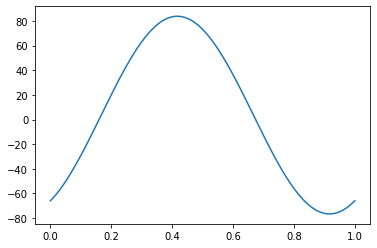

In [74]:
plt.plot(x,y)

In [82]:
popt,copt = curve_fit(funfit,x,y)
y_fit = funfit(x,*popt)

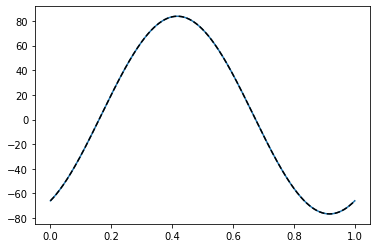

In [83]:
plt.plot(x,y)
plt.plot(x,y_fit,c="k",linestyle="--")

In [84]:
popt

array([7.86185956, 2.91596474, 1.78537675, 1.77363699])

In [90]:
print("B_pol = {:.2f} G".format( popt[0]))
print("u = {:.2f} ".format( popt[1] ))
print("Beta  = {:.2f} deg".format( popt[2]*180/(2*np.pi)) )
print("i  = {:.2f} deg".format( popt[2]*180/(2*np.pi)) )

B_pol = 7.86 G
u = 2.92 
Beta  = 51.15 deg
i  = 51.15 deg
